In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Giving dataset link from google drive
df = pd.read_csv("/content/drive/MyDrive/Dataset/Hotel_Reviews.csv")
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
df.shape

(515738, 17)

In [ ]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [ ]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [ ]:
df['Hotel_Address'].nunique()

1493

In [ ]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

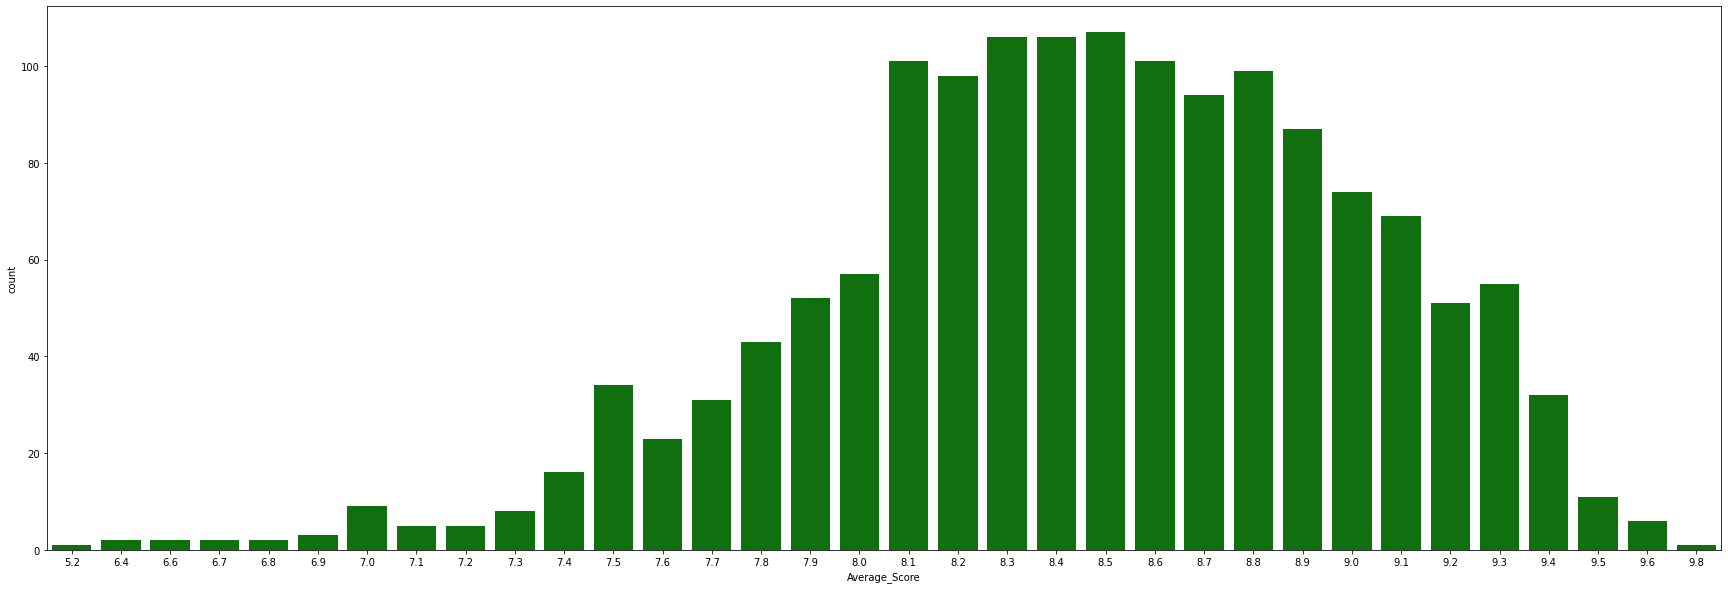

In [ ]:
# Plotting the Average scores of the hotels
df_sd = df[['Hotel_Name','Average_Score']].drop_duplicates() # Dropping any duplicates
plt.figure(figsize = (30,10))
sns.countplot(x = 'Average_Score',data = df_sd,color = 'green')
# From the graph below, we can notice that most hotels were given scores ranging from 8.1 to 8.9

Text(0, 0.5, 'Count')

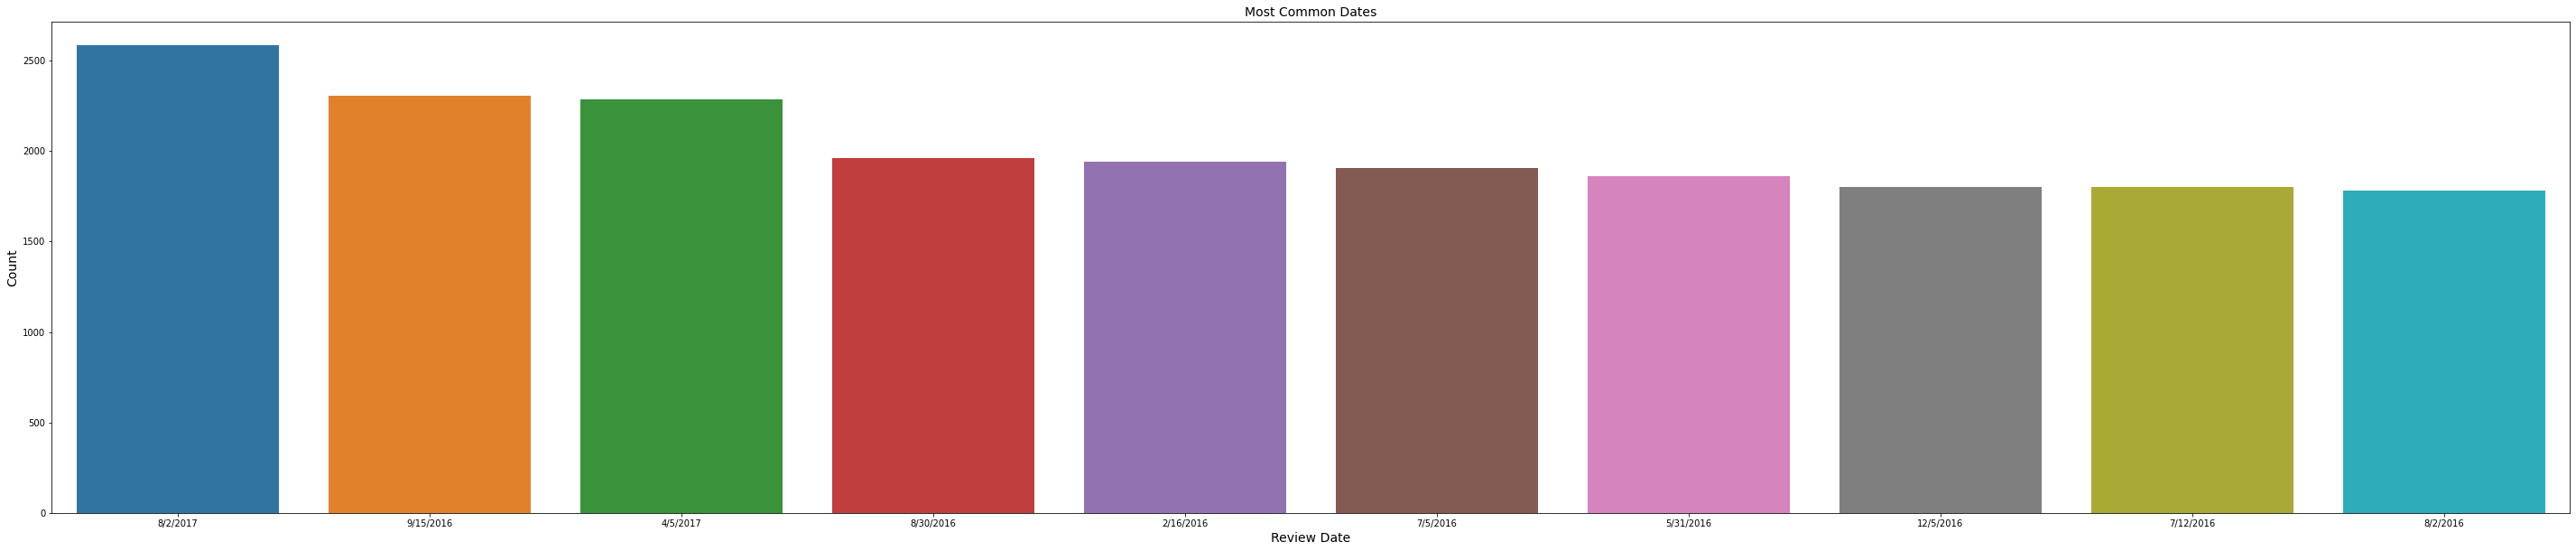

In [ ]:
df.Review_Date.value_counts(dropna = False)
dates = df.Review_Date.value_counts()[:10]
plt.figure(figsize = (50,10))
sns.barplot(x = dates.index, y = dates)
plt.title("Most Common Dates", fontdict = {"fontsize" : 14})
plt.xlabel("Review Date", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})

In [ ]:
df.Hotel_Name.nunique()

1492

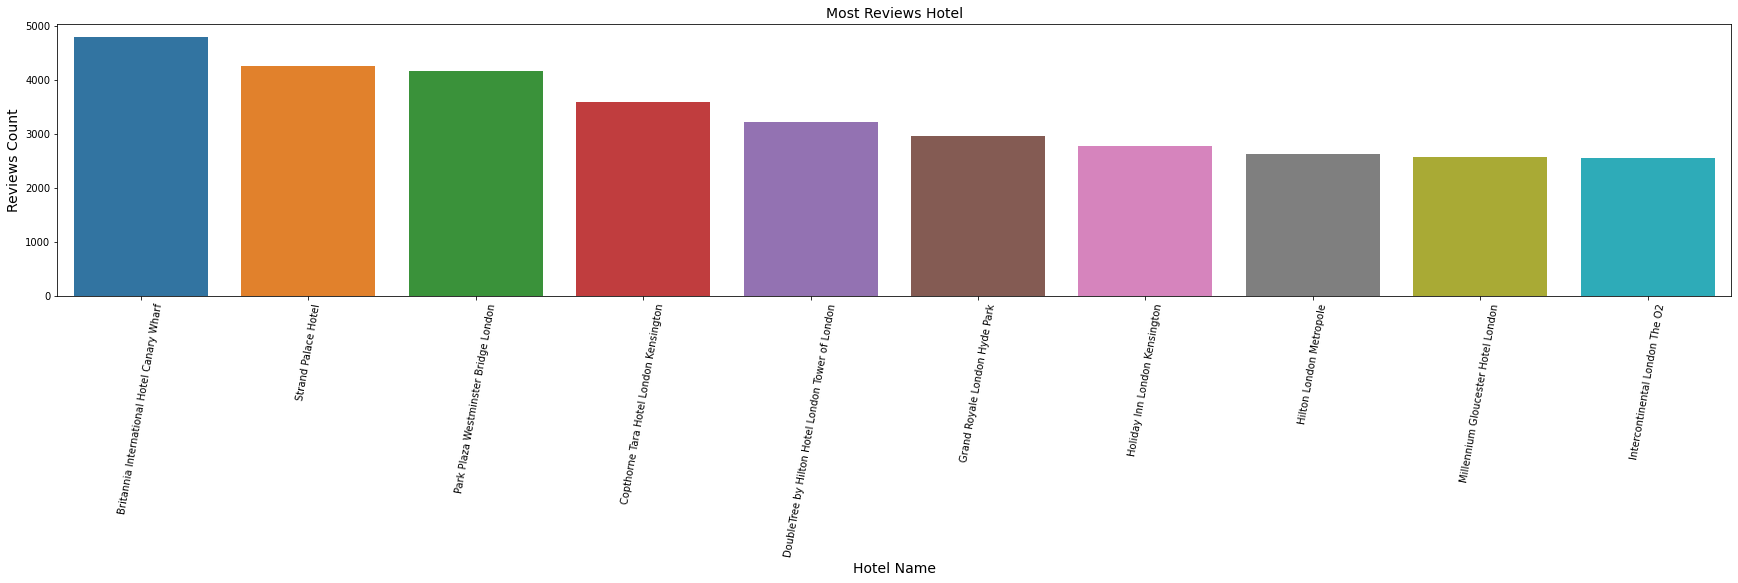

In [ ]:
names = df.Hotel_Name.value_counts(dropna = False)[:10]## ençok yorum alan 10 otel ismi

plt.figure(figsize = (30,5))
sns.barplot(x = names.index, y = names)
plt.title("Most Reviews Hotel", fontdict = {"fontsize" : 14})
plt.xlabel("Hotel Name", fontdict = {"fontsize" : 14})
plt.ylabel("Reviews Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=80);

In [ ]:
df.Reviewer_Nationality.nunique()

227

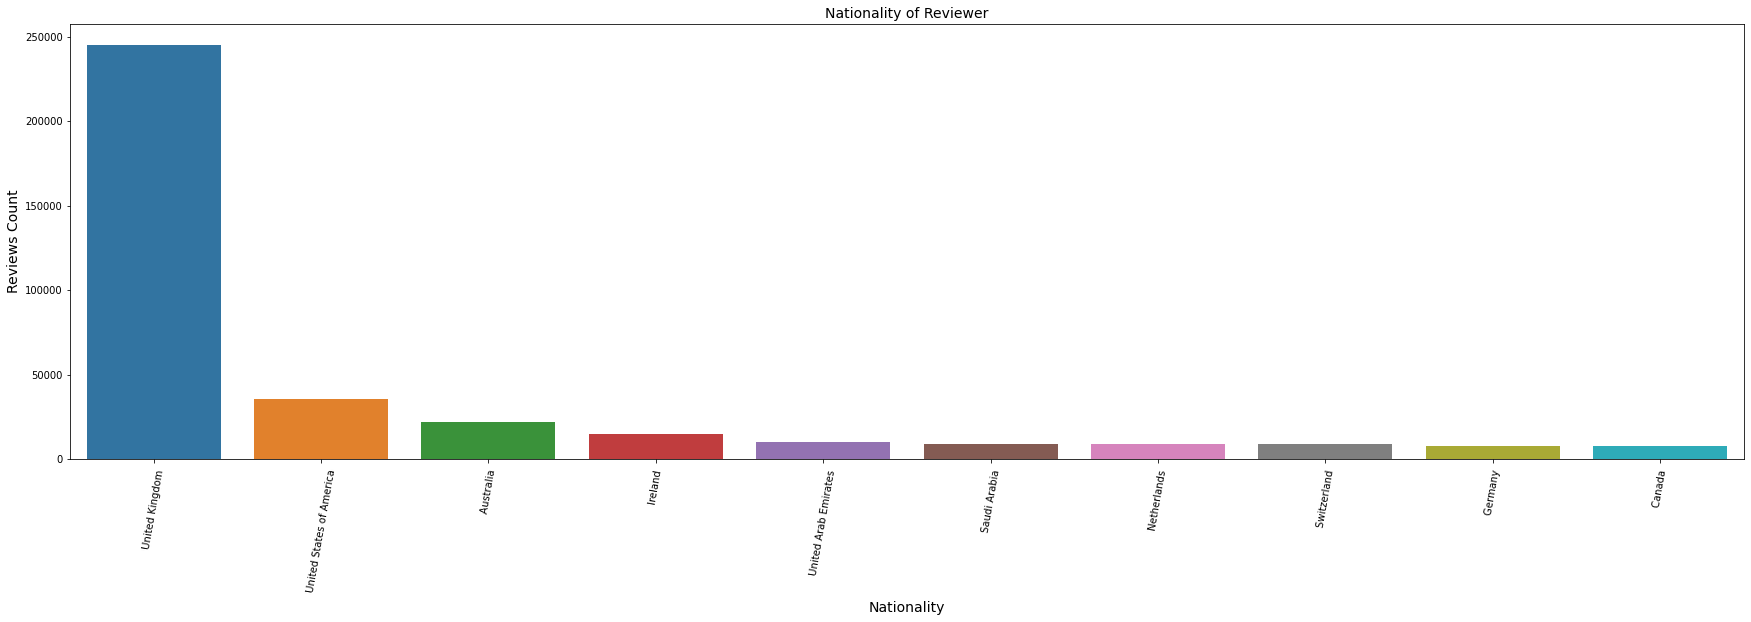

In [ ]:
nationality = df.Reviewer_Nationality.value_counts(dropna = False)[:10]
plt.figure(figsize = (30,10))
sns.barplot(x = nationality.index, y = nationality)
plt.title("Nationality of Reviewer", fontdict = {"fontsize" : 14})
plt.xlabel("Nationality", fontdict = {"fontsize" : 14})
plt.ylabel("Reviews Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=80);

### Sorting hotels by average score

In [ ]:
df[df.Average_Score >= 8.4][["Hotel_Name", "Average_Score", "Total_Number_of_Reviews"]].drop_duplicates().sort_values(by="Total_Number_of_Reviews", ascending=False)[:20]


,Hotel_Name,Average_Score,Total_Number_of_Reviews
504027,Park Plaza Westminster Bridge London,8.7,12158
311000,Best Western Premier Hotel Couture,8.7,8177
509232,The Student Hotel Amsterdam City,8.7,7656
379680,Golden Tulip Amsterdam West,8.5,7586
236055,DoubleTree by Hilton Hotel London Tower of London,8.7,7491
404728,Glam Milano,8.8,7371
309843,Jaz Amsterdam,8.9,7108
140872,Blakemore Hyde Park,8.5,6596
5257,Park Plaza County Hall London,8.4,6117
183024,St James Court A Taj Hotel London,8.7,5394


In [ ]:
#raising the average score to 8.8
#sorted by total number of reviews
df[df.Average_Score >= 8.8][["Hotel_Name", "Average_Score", "Total_Number_of_Reviews"]].drop_duplicates().sort_values(by="Total_Number_of_Reviews", ascending=False)[:20]


,Hotel_Name,Average_Score,Total_Number_of_Reviews
404728,Glam Milano,8.8,7371
309843,Jaz Amsterdam,8.9,7108
327773,Ayre Hotel Gran V a,8.8,4887
57597,M by Montcalm Shoreditch London Tech City,9.1,4802
450210,Hotel Esther a,9.1,4687
180550,citizenM Tower of London,9.1,4672
370315,25hours Hotel beim MuseumsQuartier,8.8,4324
361190,Hilton London Wembley,8.8,4305
14829,Intercontinental London The O2,9.4,4204
470003,The Square Milano Duomo,9.0,4192


### Distribution of hotels

In [ ]:
#Replace "United Kingdom" with "UK" for easier processing
#extract out the countries the hotels are based in into a new column, "Locations"
df.Hotel_Address = df.Hotel_Address.str.replace("United Kingdom", "UK")
df["Locations"] = df.Hotel_Address.apply(lambda x: x.split(" ")[-1])
df.sample(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Locations
453442,Sonnenhofgasse 8 10 05 Margareten 1050 Vienna ...,284,5/10/2016,8.2,Austria Trend Hotel Ananas Wien,Turkey,No Negative,0,4217,It was very close to metro in front of metro ...,39,5,9.6,"[' Leisure trip ', ' Family with young childre...",450 day,48.191540,16.354626,Austria
270537,Annagasse 7 01 Innere Stadt 1010 Vienna Austria,142,8/9/2016,8.4,Hotel Mailberger Hof,United Kingdom,We had to change rooms as the aircondtioning ...,36,1781,The location was excellent and the staff very...,12,10,9.2,"[' Leisure trip ', ' Couple ', ' Superior Doub...",359 day,48.204183,16.372666,Austria
170338,39 Avenue de l Op ra 2nd arr 75002 Paris France,80,8/18/2016,9.1,Edouard 7 Paris Op ra,China,No Negative,0,798,Very kind staff Perfect location for Louvre m...,12,9,9.6,"[' Leisure trip ', ' Couple ', ' Superior Room...",350 day,48.868313,2.333085,France
256533,86 Park Lane Westminster Borough London W1K 7T...,96,6/27/2017,8.7,Grosvenor House Suites by Jumeirah Living,India,Bed comfort,3,303,Location and room size,5,19,7.1,"[' Leisure trip ', ' Couple ', ' Studio Deluxe...",37 days,51.509841,-0.155219,UK
277205,Avenida Diagonal 205 Sant Mart 08018 Barcelona...,144,2/28/2016,8.0,The Gates Diagonal Barcelona,Spain,The bathtub was small and a bit old Could hav...,23,1725,Really nice corner room with a lot of light n...,16,43,7.1,"[' Leisure trip ', ' Couple ', ' Comfort Doubl...",522 day,41.403622,2.190281,Spain
190184,43 Worple Road Wimbledon London SW19 4JZ UK,166,3/27/2016,8.3,The Justin James Hotel,United Kingdom,I know its London and parking is a nightmare ...,58,561,The homely feel about the Hotel I had reviewe...,42,2,7.9,"[' Leisure trip ', ' Solo traveler ', ' Single...",494 day,51.420266,-0.211268,UK
45784,130 Tottenham Court Road Camden London W1T 5AY UK,713,2/26/2017,8.3,Radisson Blu Edwardian Grafton,United Kingdom,The breakfast was extremely disappointing The...,44,2826,No Positive,0,1,6.3,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",158 day,51.524139,-0.138081,UK
254467,82 Gloucester Place Westminster Borough London...,204,7/16/2017,7.5,Hotel 82 London,Spain,Two single beds put together One of the beds ...,28,1733,Staff were lovely and very helpful Location w...,23,13,7.9,"[' Business trip ', ' Couple ', ' Superior Dou...",18 days,51.519586,-0.158480,UK
206551,51 rue Letort 18th arr 75018 Paris France,40,1/25/2017,7.6,Best Western Le 18 Paris,India,The location was the worst It s the last metr...,51,527,Clean hotel and friendly staff,6,1,4.2,"[' Business trip ', ' Solo traveler ', ' Comfo...",190 day,48.896617,2.343484,France
419662,Prins Hendrikkade 33 Amsterdam City Center 101...,482,9/26/2015,9.0,art otel Amsterdam,Kuwait,No Negative,0,3158,Friendly staff great service,5,3,9.6,"[' Leisure trip ', ' Group ', ' Art King Room ...",677 day,52.377743,4.897057,Netherlands


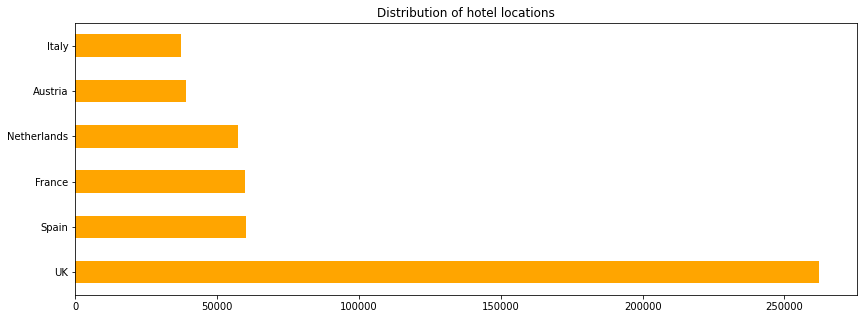

In [ ]:
plt.figure(figsize = (14,5))
plt.title("Distribution of hotel locations")
df.Locations.value_counts().plot.barh(color = "orange")
plt.savefig("distribution.png")

In [ ]:
df["Negative_Review"] = [i.strip() for i in df["Negative_Review"]]# stripingin negative reviews
df["Positive_Review"] = [i.strip() for i in df["Positive_Review"]] #stripingin positive reviews
df["All_Review"] = df["Negative_Review"] + " " + df["Positive_Review"] 
#We combine 2 reviews and create the all review featuer.
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Locations,All_Review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available ...,397,1403,Only the park outside of the hotel was beautiful,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,I am so angry that i made this post available ...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great l...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficult...,42,1403,Location was good and staff were ok It is cute...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands,Rooms are nice but for elderly a bit difficult...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk bar...,210,1403,Great location in nice surroundings the bar an...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands,My room was dirty and I was afraid to walk bar...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line yo...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands,You When I booked with your company on line yo...


In [ ]:
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:10]
# We now attempt to find the 10 most popular hotels based on 'Total number of reviews, Average score greater than 8.8, and the Hotel names'

,Hotel_Name,Average_Score,Total_Number_of_Reviews
404728,Glam Milano,8.8,7371
309843,Jaz Amsterdam,8.9,7108
327773,Ayre Hotel Gran V a,8.8,4887
57597,M by Montcalm Shoreditch London Tech City,9.1,4802
450210,Hotel Esther a,9.1,4687
180550,citizenM Tower of London,9.1,4672
370315,25hours Hotel beim MuseumsQuartier,8.8,4324
361190,Hilton London Wembley,8.8,4305
14829,Intercontinental London The O2,9.4,4204
470003,The Square Milano Duomo,9.0,4192


In [ ]:
df['Positive_Review'] # Having a look at positive reviews

0          Only the park outside of the hotel was beautiful
1         No real complaints the hotel was great great l...
2         Location was good and staff were ok It is cute...
3         Great location in nice surroundings the bar an...
4            Amazing location and building Romantic setting
                                ...                        
515733                                             location
515734         Breakfast was ok and we got earlier check in
515735                                          No Positive
515736    The rooms are enormous and really comfortable ...
515737                                  staff was very kind
Name: Positive_Review, Length: 515738, dtype: object

DATA PREPROCESSING

In [ ]:
import nltk # Natural language processing toolkit
from nltk import FreqDist # Frequency distribution

import re # for regular expressions
import spacy # library for advanced Natural Language Processing 

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(30,10))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

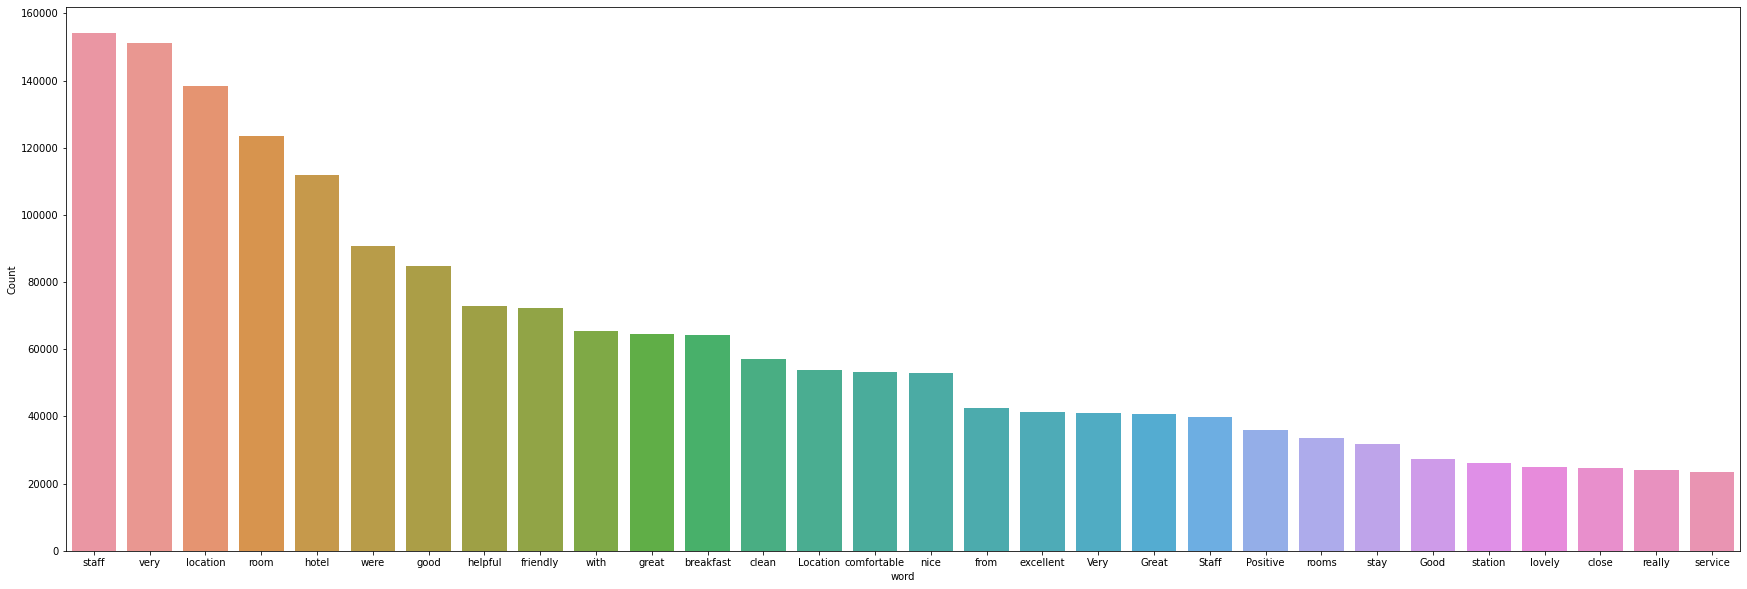

In [ ]:
freq_words(df['Positive_Review']) # Frequency distribution of common words in positive reviews

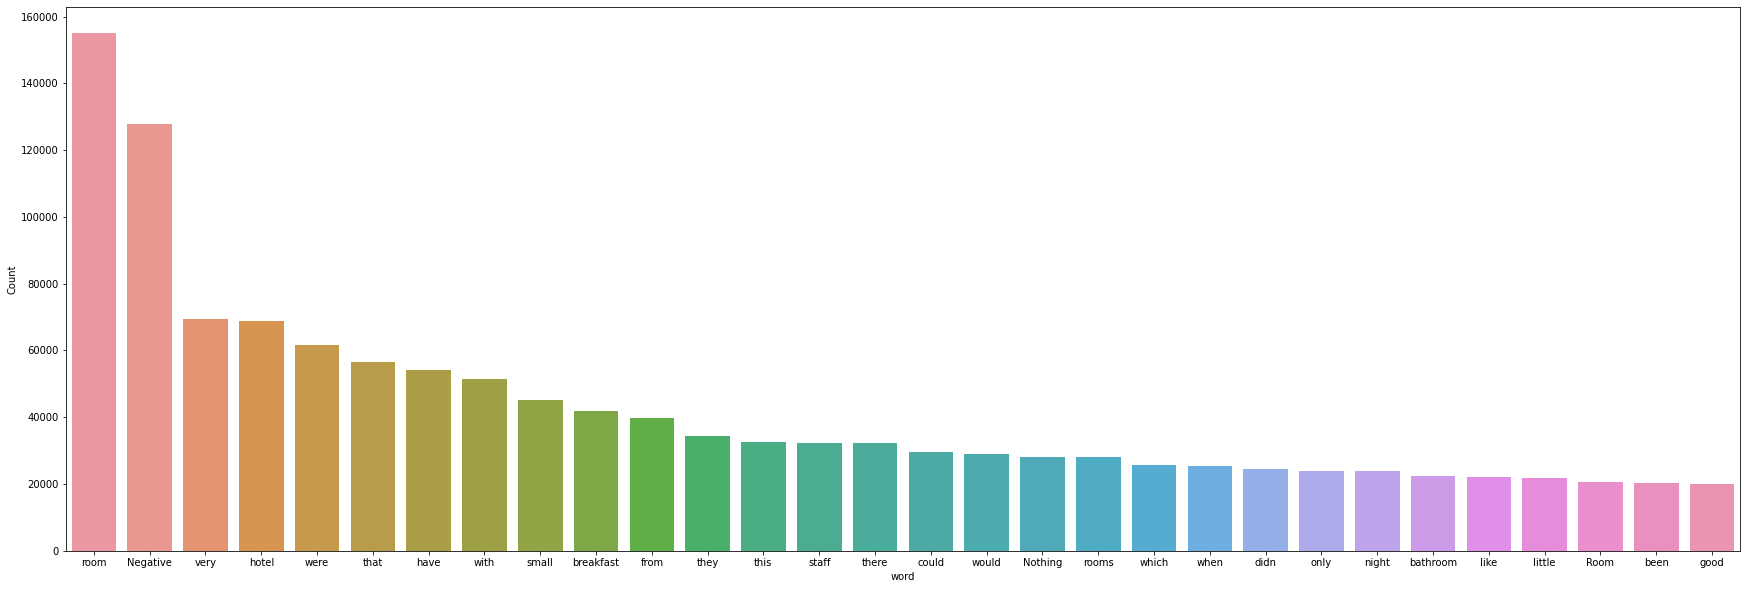

In [ ]:
freq_words(df['Negative_Review'])  # Frequency distribution of common words in negative reviews

In [ ]:
# You probably noticed we has a lot of word like 'the', 'was', 'to' e.t.c which won't help so we would remove them.
# First of all, we remove unwanted characters, numbers and symbols
df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new
# I would apply everyting below to both positive and negative reviews
# remove short words (length < 4)
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


# remove stopwords from the text
reviews_1 = [remove_stopwords(r.split()) for r in df['Positive_Review']]
reviews_2 = [remove_stopwords(r.split()) for r in df['Negative_Review']]



# make entire text lowercase
reviews_1= [r.lower() for r in reviews_1] 
reviews_2= [r.lower() for r in reviews_2]
# From what i read, Nltk sees 'stop' and 'STOP' as different things. Making all lowercase seems good but I dont think i want to so that i can identify the 'No Negative' and 'No positive'in it. 
# if you dont get, just bring the question to our channel

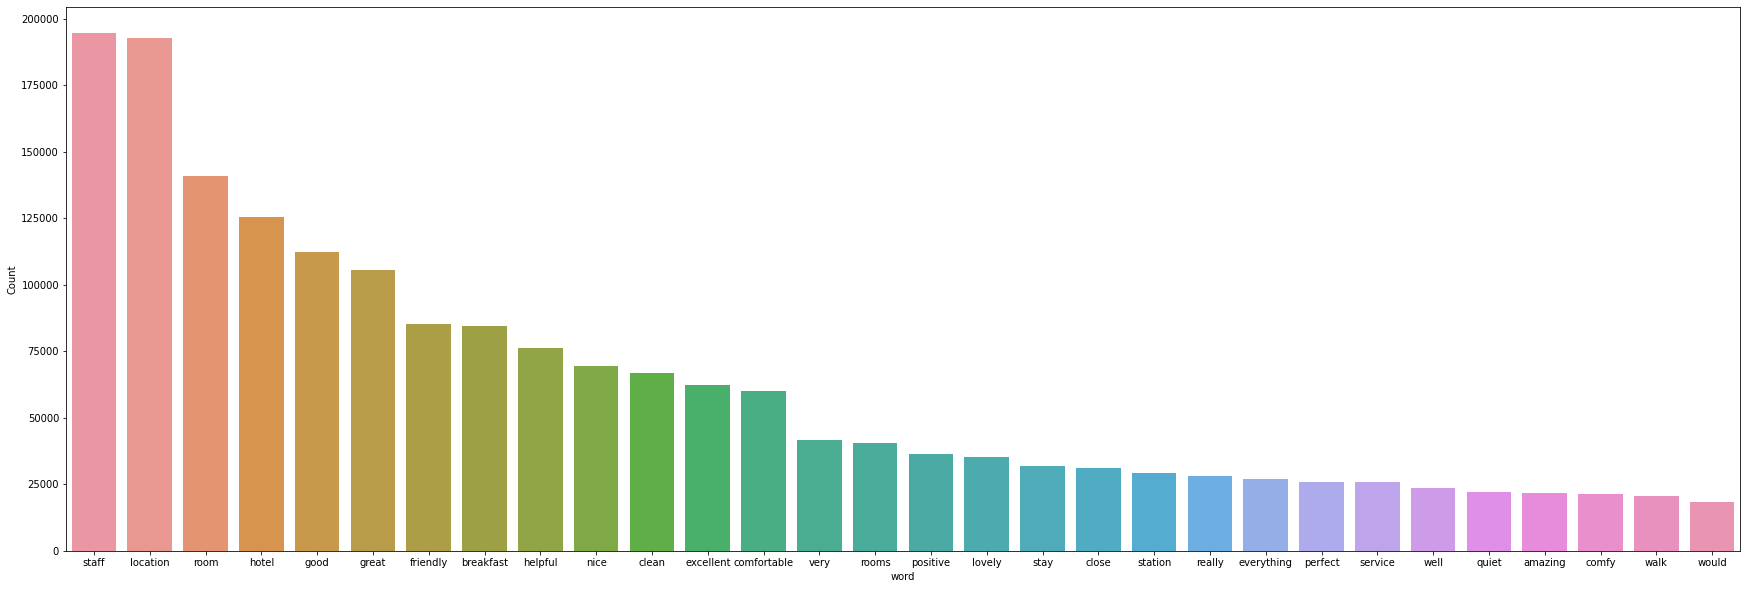

In [ ]:
freq_words(reviews_1, 30)

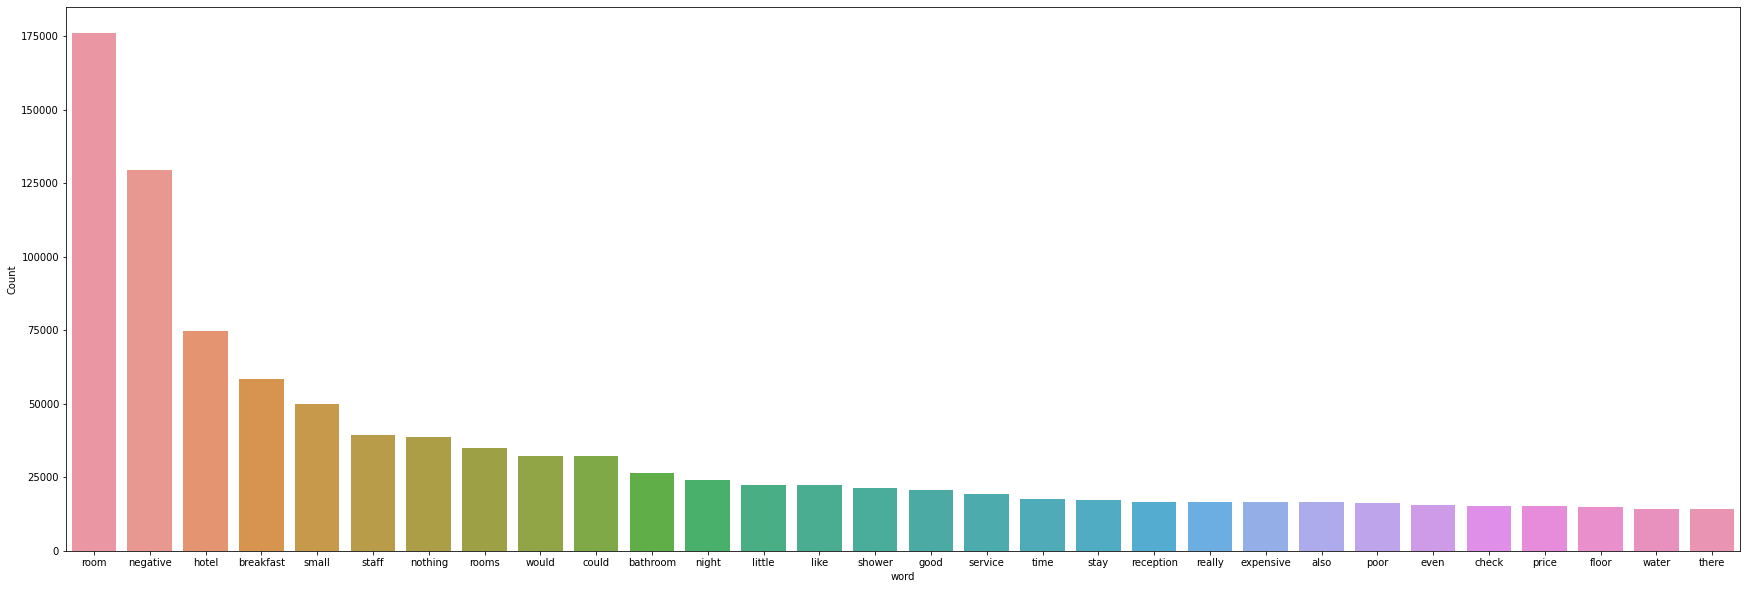

In [ ]:
freq_words(reviews_2, 30) 

Positive reviews


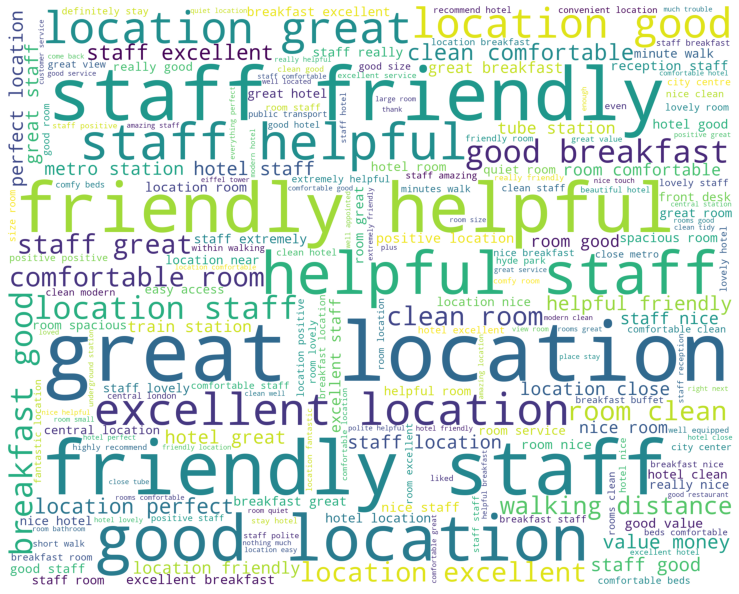

Negative reviews


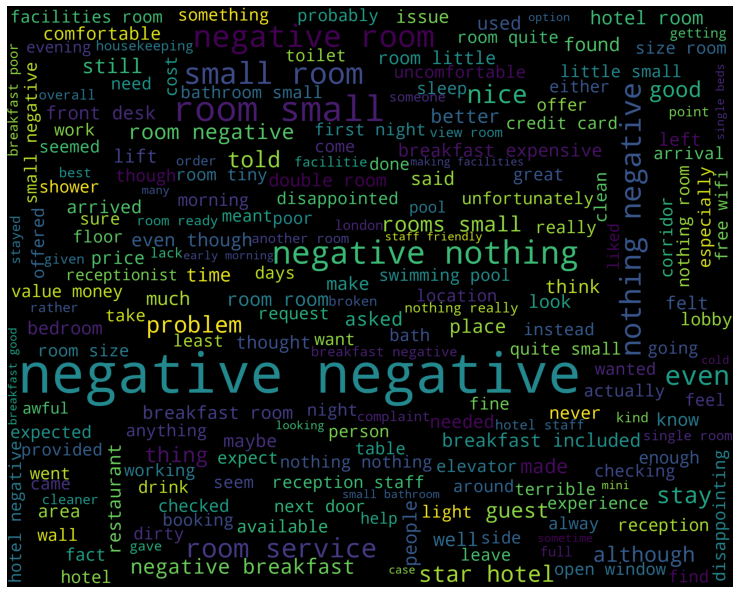

In [ ]:
# Using wordcloud to visually represent the text data
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive reviews")
wordcloud_draw(reviews_1,'white')
print("Negative reviews")
wordcloud_draw(reviews_2)

## Creating Machine Learning Model

In [ ]:
# read data
reviews_df = pd.read_csv("/content/drive/MyDrive/Dataset/Hotel_Reviews.csv")
# append the positive and negative text reviews
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
# create the label
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [ ]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [ ]:
# remove 'No Negative' or 'No Positive' from text
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [ ]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [ ]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_yet,word_yoghurt,word_yogurt,word_young,word_yr,word_yummy,word_zero,word_ziggo,word_zone,word_zuid
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.244739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,-0.042560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,0.055006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,-0.005388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,-0.070027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
reviews_df.shape

(51574, 3840)

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
43101,A perfect location comfortable great value,0.931
211742,Clean comfortable lovely staff,0.907
175551,Friendly welcome Comfortable room,0.905
365085,Good location great value,0.904
109564,Clean friendly and comfortable,0.902
145743,Good value amazing location,0.901
407590,breakfast excellent Clean comfort,0.899
407546,Great place I enjoyed,0.881
218571,Beautiful Quirky Comfortable,0.878
436901,Lovely comfortable rooms,0.877


In [ ]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799
29666,A bit noisy No,0.796
426057,Dirty hotel Smells bad,0.762
263187,Very bad service No,0.758
443796,Nothing perfect,0.750
181508,Window blind was broken,0.744
175316,Nothing Super friendly staff,0.743


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


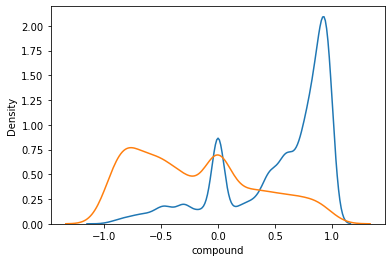

In [ ]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [ ]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [ ]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.034574
2,pos,0.025713
0,neg,0.021324
7,doc2vec_vector_1,0.019519
6,doc2vec_vector_0,0.018193
10,doc2vec_vector_4,0.017872
9,doc2vec_vector_3,0.017703
8,doc2vec_vector_2,0.016718
4,nb_chars,0.016315
1,neu,0.015622


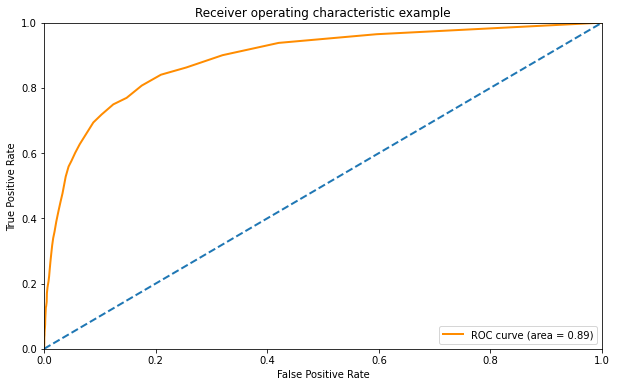

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (10, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.37')

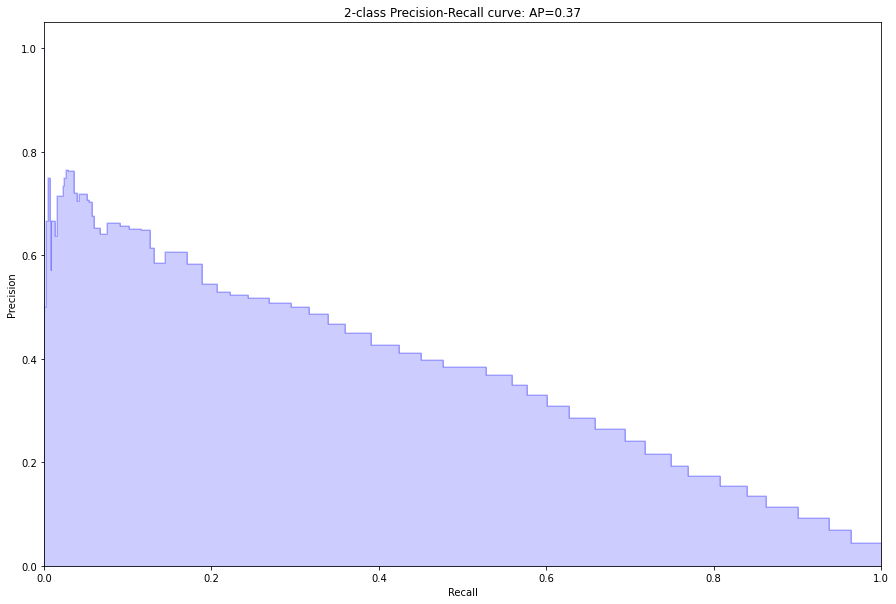

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
try:
    from inspect import signature
except ImportError:
    from ..externals.funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))